### 빅데이터 실습

#### 제주도 핫플레이스 웹크콜링

#### 셀레니움 사용

In [38]:
# 셀레니움 사용등록
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata #유니코드 데이터 처리 모듈
import re # 정규식 처리 모듈
import time

In [14]:
driver = webdriver.Chrome()

##### 인스타그램 접속

In [15]:
# 인스타그램 접속
driver.get('https://www.instagram.com')
time.sleep(2.0)

##### 자동 로그인
- 로그인 화면, 아이디, 패스워드 입력하는 html name 속성이 생김

In [16]:
input_id = '' 
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

## 인스타그램 비밀번호 입력
password = ''
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(2.0)

NameError: name 'email' is not defined

##### 태그로 검색하면 30개 이상 검색안됨
- 한 그룹의 게시물로 대체

In [17]:
## 검색결과 URL 함수
def searchInstagram(word):
  url = 'https://www.instagram.com/explore/tags/{word}'
  return url

In [18]:
driver.get(searchInstagram('제주도맛집'))

In [43]:
## 제주나드리 게시글로 검색
#https://www.instagram.com/jeju__nadri/
driver.get('https://www.instagram.com/jeju__nadri/')

##### 게시글 클릭 후 게시글 정보 가져오기

In [44]:
# 첫번째 게시글 클릭하는 함수
first = driver.find_elements(By.CLASS_NAME, '_aagw')[0]
first.click()
time.sleep(2.0)

In [45]:
## 게시글 정보 가져오기 함수
def getContent(driver):
  pass

In [58]:
## 게시글 가져오기 로직
## 1. HTML코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## 2. 팝업 본문내용 가져오기
content = soup.select('div._a9zr>div>h1')[0].text

firstIndex = str(soup.select('div._a9zr>div>h1')[0]).index('>')
lastIndex = str(soup.select('div._a9zr>div>h1')[0]).index('<br/>')
shopName = str(soup.select('div._a9zr>div>h1')[0])[firstIndex+1:lastIndex]

#content.split('📍')[1]

## 3. 본문에서 해시태그 가져오기
tags = re.findall(r'#[^\s#,\\]+', content)
tags


# ## 4. 포스트 작성일자
date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]
date

# ## 5. 좋아요 수 가져오기
like = soup.select('span.xdj266r.x11i5rnm.x1vvkbs')[3].text
like

## 6. 위치정보
re.findall(r'(\w+[시]\s*)?', content)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '제주시 ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 

#### 워드 클라우드(Word Cloud)
- 태그 중에서 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 작게 표현해서 마치 구름처럼 나타내는 방법

In [61]:
import pandas as pd

In [66]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [71]:
##
raw_total['tags'][33][2:-2].split("', '")[1]

'#카운트다운'

In [73]:
## tqdm 모듈 사용
from tqdm import tqdm

In [74]:
tagAllList = []

for tags in tqdm(raw_total['tags']): # 8800개 반복
  tagList = tags[2:-2].split("', '") #다시 리스트로
  for tag in tagList: # 갯수가 유동
    tagAllList.append(tag)
  

100%|██████████| 8801/8801 [00:00<00:00, 220143.30it/s]


In [76]:
## 해시태그 출현 빈도 집계
from collections import Counter

In [77]:
tagCounts = Counter(tagAllList)

In [78]:
tagCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [79]:
## 맛집 이외의 해시태그는 제외
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', 
'#눈썹문신', '#제주자연눈썹','#제주속눈썹', '#제주도그램', '#선팔', '#서귀포', '#제주살이',
'#여행스타그램', '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신']

tagFilterList = []
for tag in tagAllList:
  if tag not in STOPWORDS: # 제외시킬 단어에 속하지 않으면
    tagFilterList.append(tag)
    

In [81]:
tagFilterCounts = Counter(tagFilterList)
tagFilterCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#소통', 396),
 ('#맞팔', 395)]

##### 시각화

In [91]:
# 시각화 라이브러리 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [84]:
# 차트 스타일 지정
sns.set_style('darkgrid')

In [93]:
dfTagCounts = pd.DataFrame(tagFilterCounts.most_common(30))

In [99]:
## 불필요한 경고메시지 제거
import warnings
warnings.filterwarnings('ignore')

In [94]:
dfTagCounts.columns =['tag','counts']

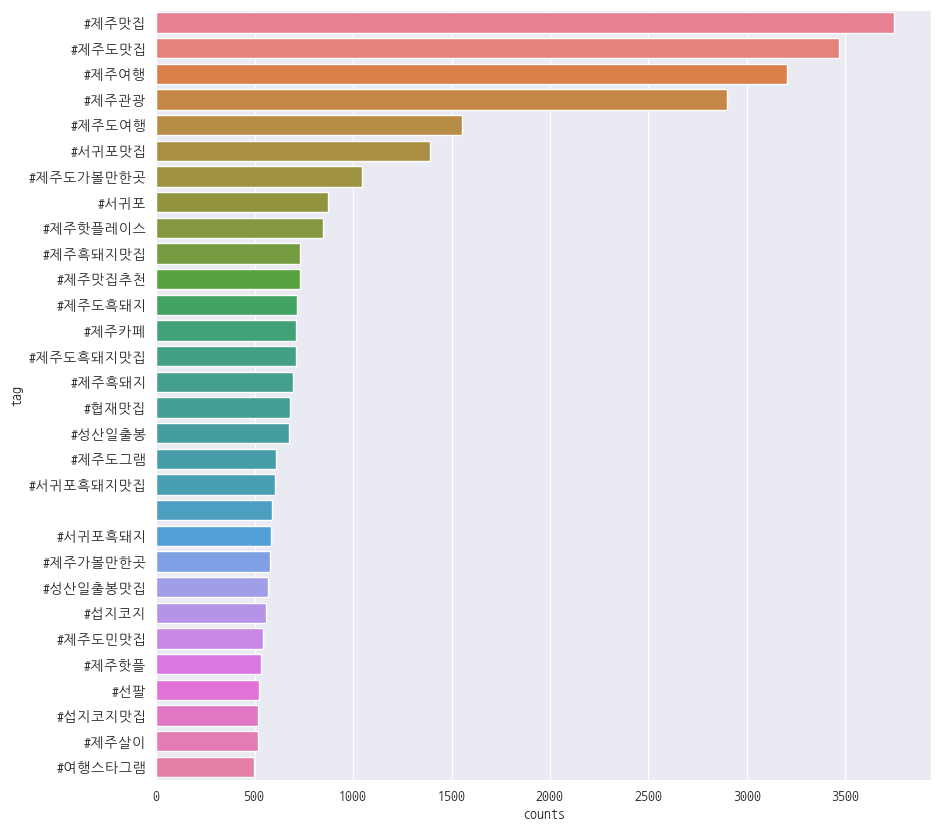

In [102]:
## 막대차트
plt.figure(figsize=(10, 10))
## palette 종류 : pastel, husl 등등..
sns.barplot(x='counts', y='tag', data=dfTagCounts, palette='husl')
plt.show()

In [126]:
# 워드 클라우드 라이브러리 사용등록
from wordcloud import WordCloud

In [127]:
import platform

if platform.system() == 'Windows':
  fontPath = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
elif platform.system() == 'Darwin': #macos
  fontPath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

In [124]:
sns.set_style('white')

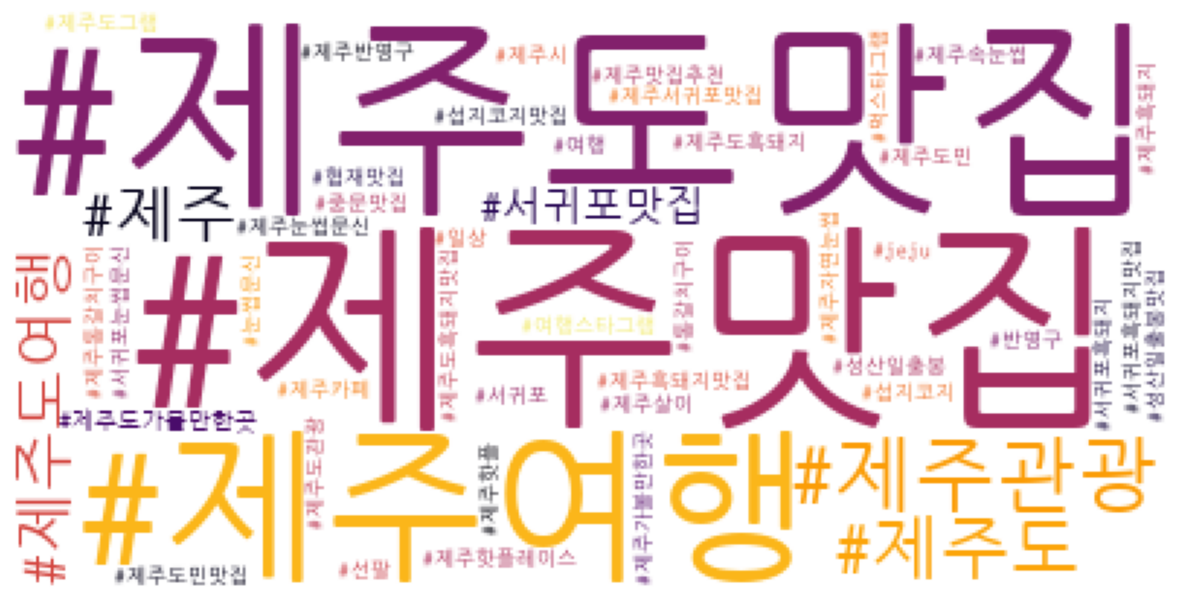

In [128]:
# 워드 클라우드 만들기
tagsList = dict(tagCounts.most_common(50))
wc = WordCloud(font_path=fontPath, colormap='inferno', background_color='white', max_words=100).generate_from_frequencies(tagsList)

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off') #x,y좌표 숨김
plt.show()

In [136]:
# 폰트 경로 변경
if platform.system() == 'Windows':
  fontPath = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin': #macos
  fontPath = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

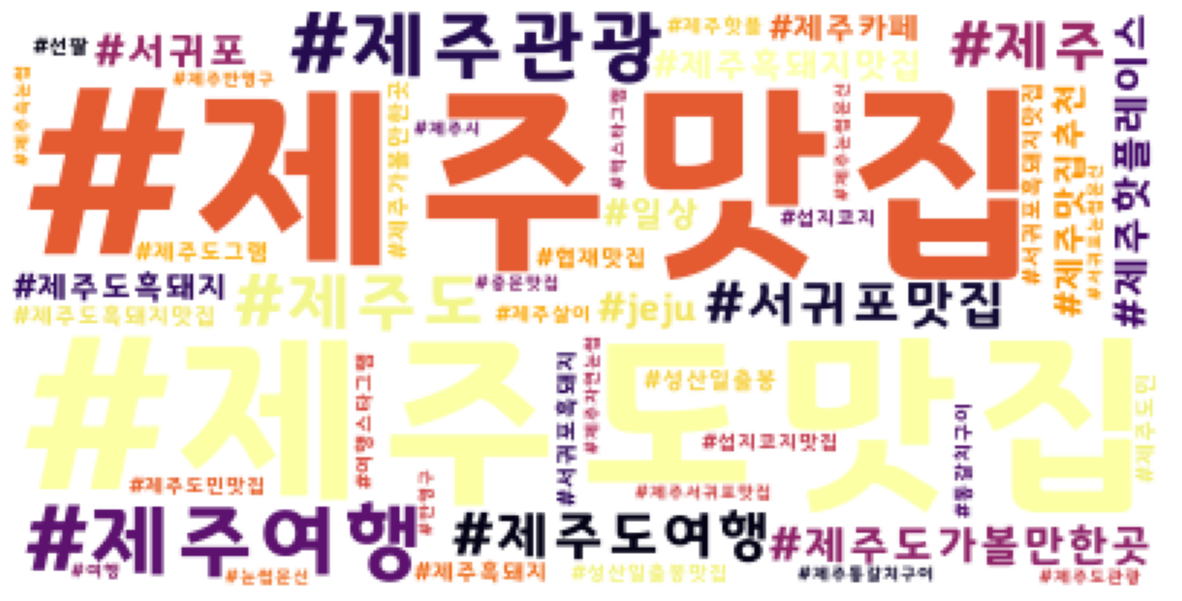

In [140]:
# 워드 클라우드 만들기
tagsLast = dict(tagCounts.most_common(50))
wc = WordCloud(font_path=fontPath, colormap='inferno', background_color='white', max_words=100).generate_from_frequencies(tagsList)

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off') #x,y좌표 숨김
plt.show()